# Test PDPbox with binary classification problem
## Kaggle Titanic
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os

%matplotlib inline

/group/amfs_saving_model/anaconda_new/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### read dataset

In [2]:
titanic = pd.read_csv('titanic_train.csv')

### simple feature engineering

#### impute null values

In [3]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

#### handle categrical features

In [4]:
titanic['Sex'] = titanic['Sex'].apply(lambda x : 1 if x == 'male' else 0)
titanic = pd.get_dummies(titanic, columns=['Embarked'])

#### features to used

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

## First test XGBoost 

In [6]:
clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100)
clf.fit(titanic[features], titanic['Survived'])

XGBClassifier(base_score=0.5, colsample_bylevel=0.85, colsample_bytree=0.85,
       gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.85)

## start testing PDPbox

In [7]:
from pdpbox import pdp

### binary feature: Sex
First calculate the pdp object

In [8]:
pdp_sex = pdp.pdp_isolate(clf, titanic[features], 'Sex')

#### simple pdp line with std

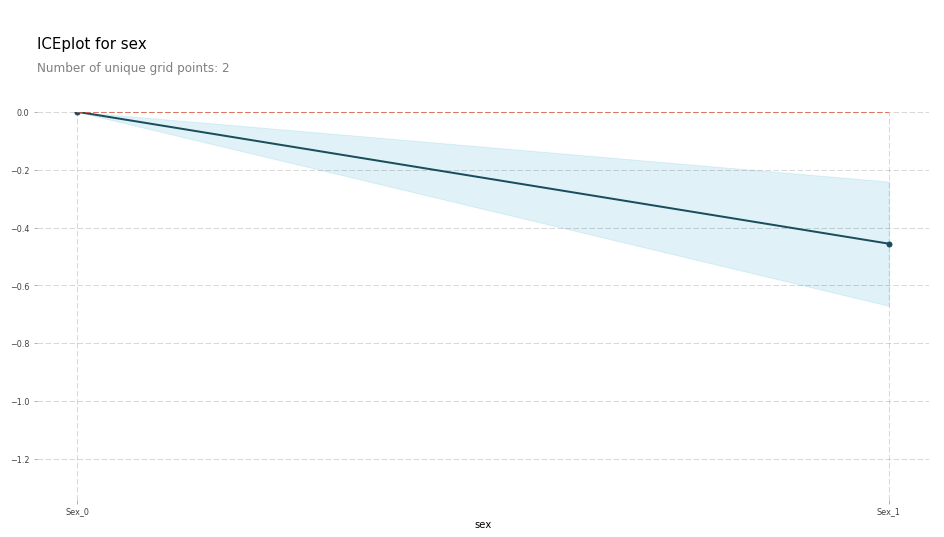

In [9]:
pdp.pdp_plot(pdp_sex, 'sex')

#### try to plot out the original points

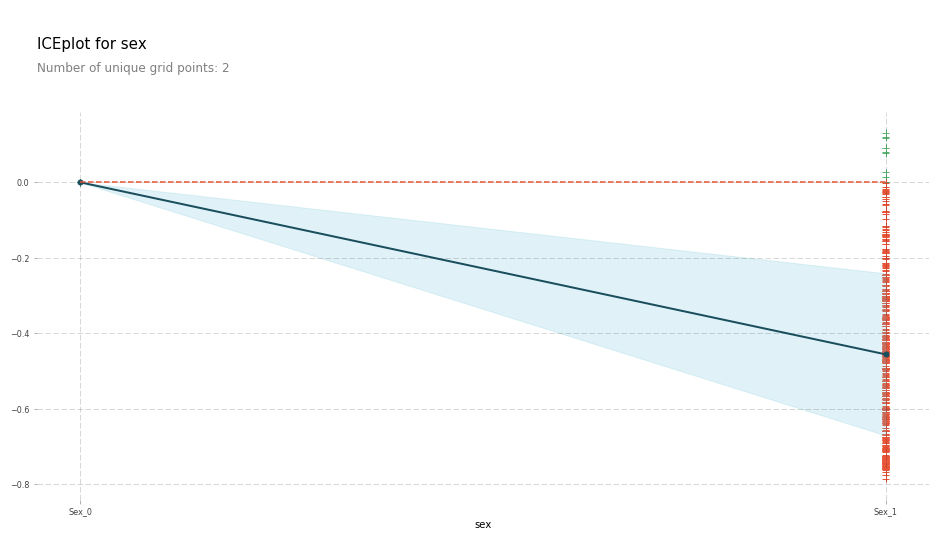

In [10]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True)

#### also plot out the individual conditional expectation lines

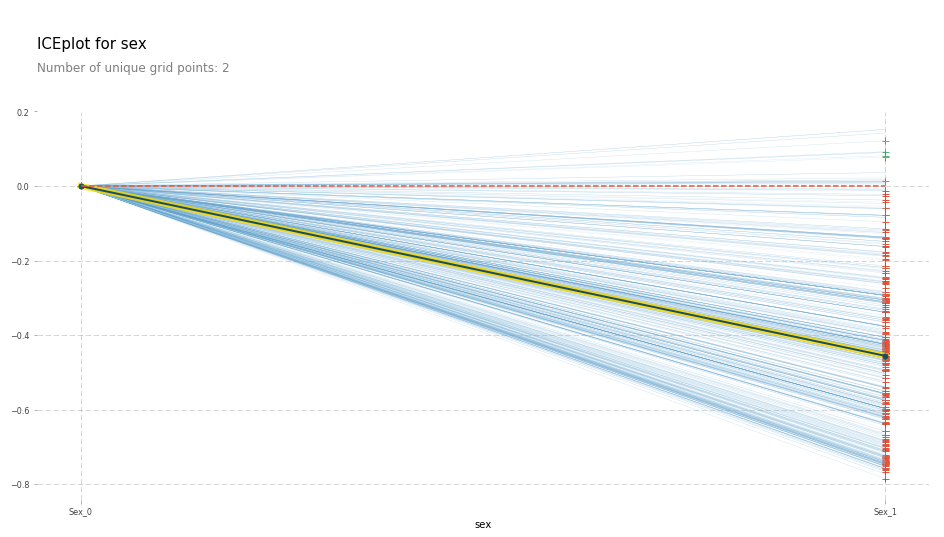

In [11]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#### try to do clustering on all the individual conditional expectation lines

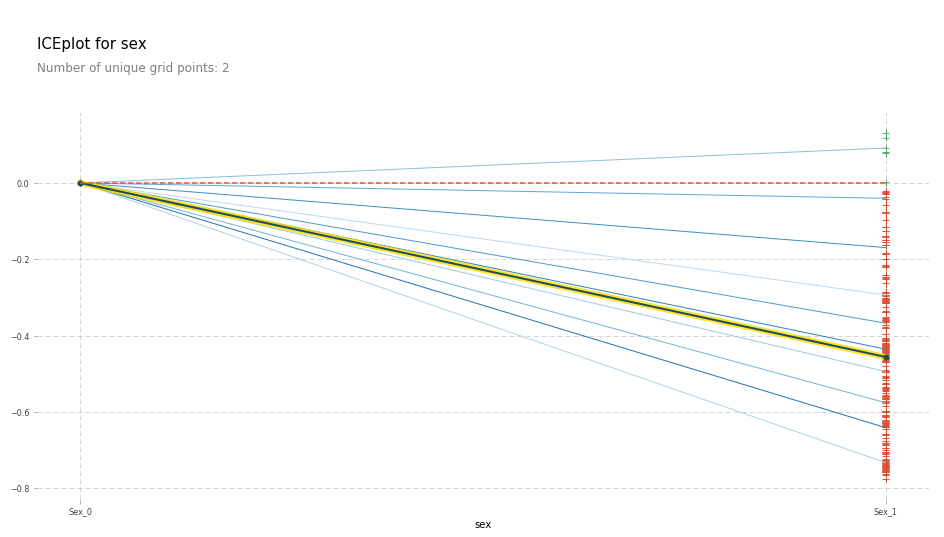

In [12]:
pdp.pdp_plot(pdp_sex, 'sex', center=True, plot_org_pts=True, frac_to_plot=0.5, cluster=True, n_cluster_centers=10)

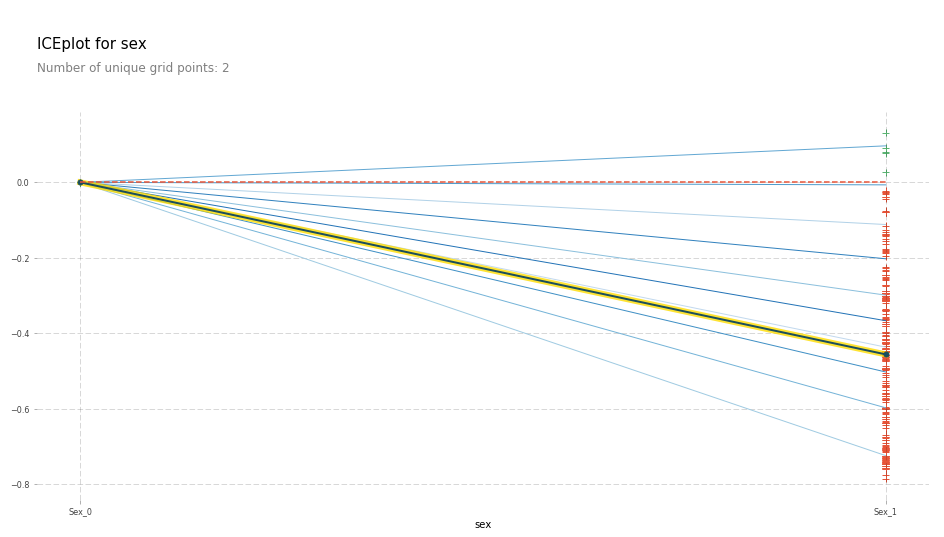

In [13]:
pdp.pdp_plot(pdp_sex, 'sex', center=True, plot_org_pts=True, frac_to_plot=0.5, 
             cluster=True, n_cluster_centers=10, cluster_method='approx')

#### try to change the figure size

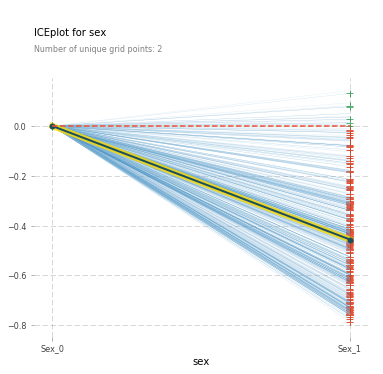

In [14]:
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, figsize=(6, 6))

#### try to customized the plot

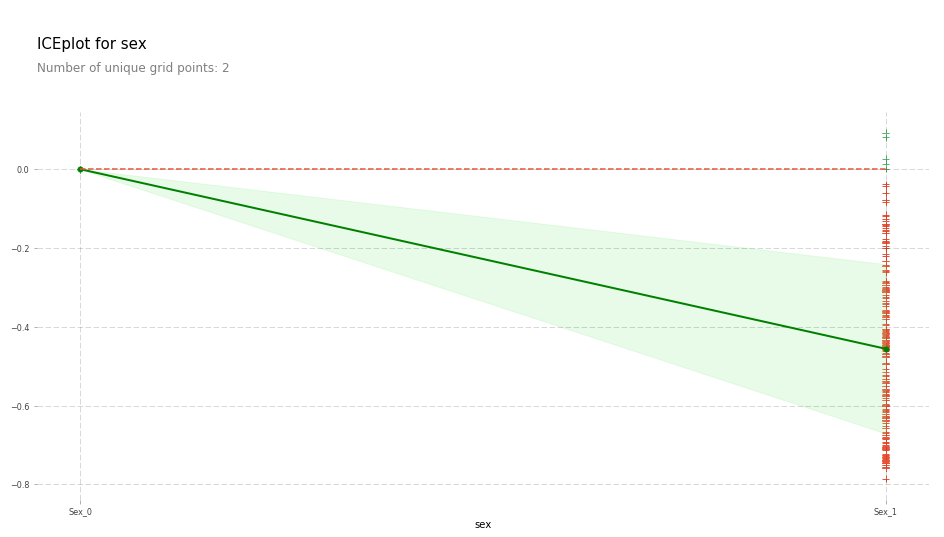

In [15]:
plot_params = {
    'pdp_color': 'green',
    'fill_color': 'lightgreen'
}
pdp.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, frac_to_plot=0.5, plot_params=plot_params)

### one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

In [16]:
pdp_embark = pdp.pdp_isolate(clf, titanic[features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])

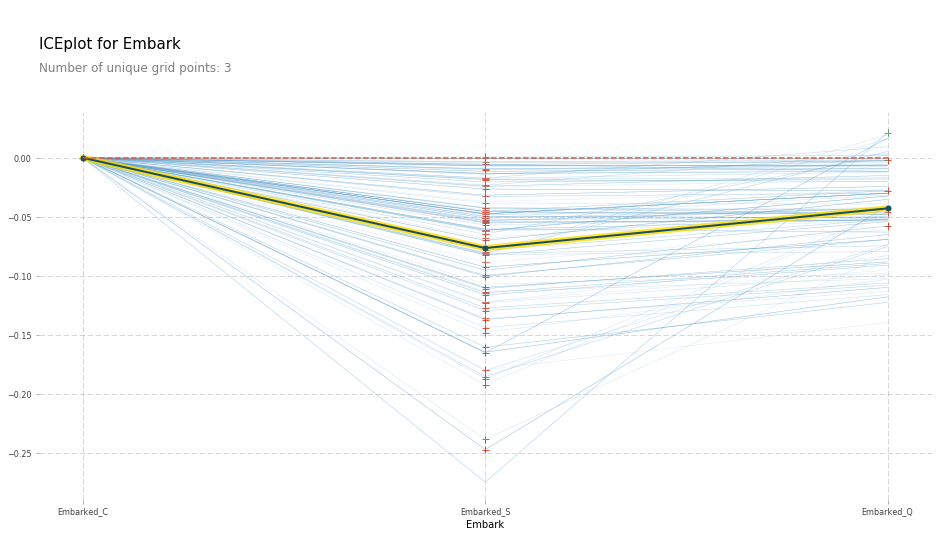

In [17]:
pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=100)

#### try to set center=False, it's harder to tell the difference when the lines are not centered

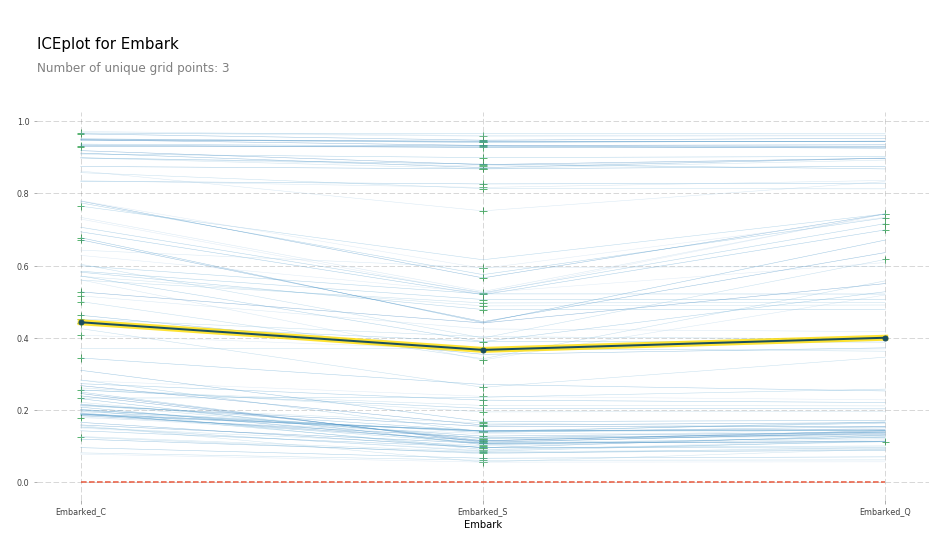

In [18]:
pdp.pdp_plot(pdp_embark, 'Embark', center=False, plot_org_pts=True, plot_lines=True, frac_to_plot=100)

### numeric feature: Fare

In [18]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare')

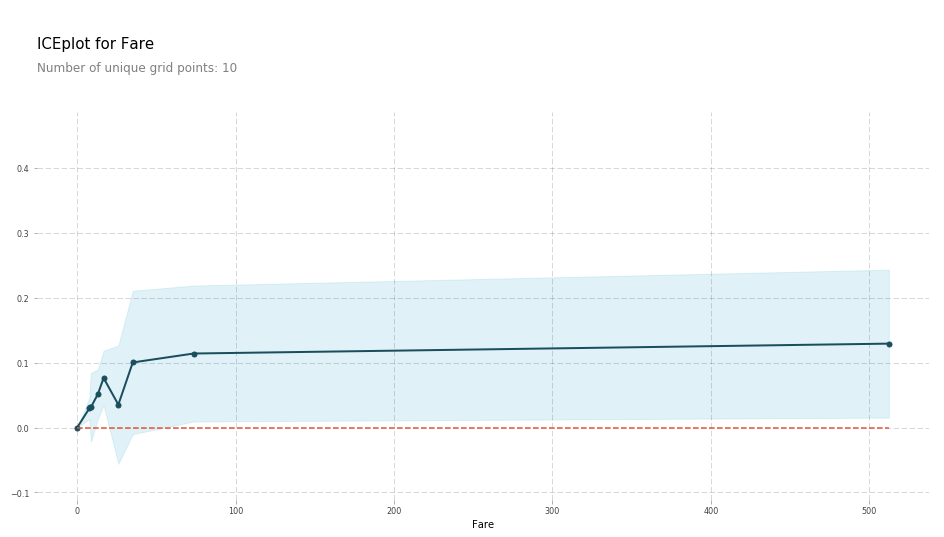

In [19]:
pdp.pdp_plot(pdp_fare, 'Fare')

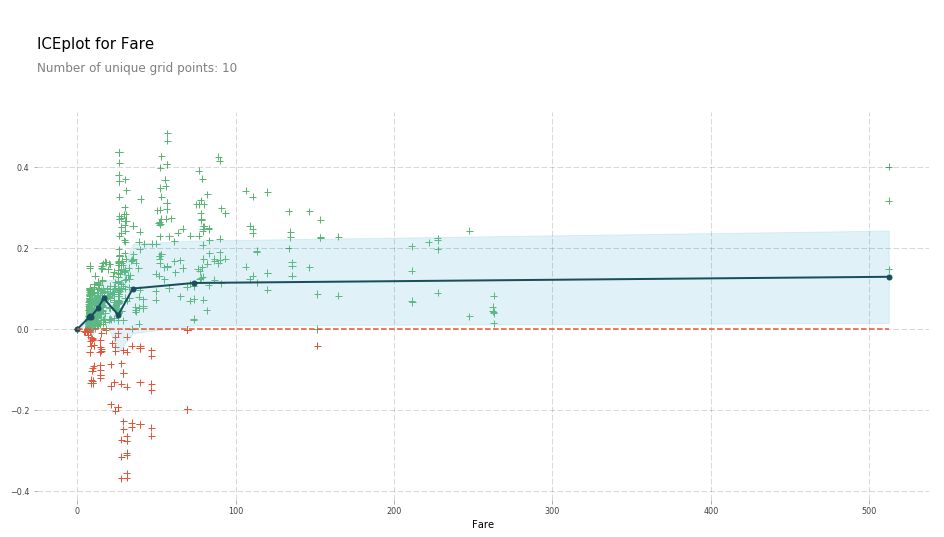

In [21]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True)

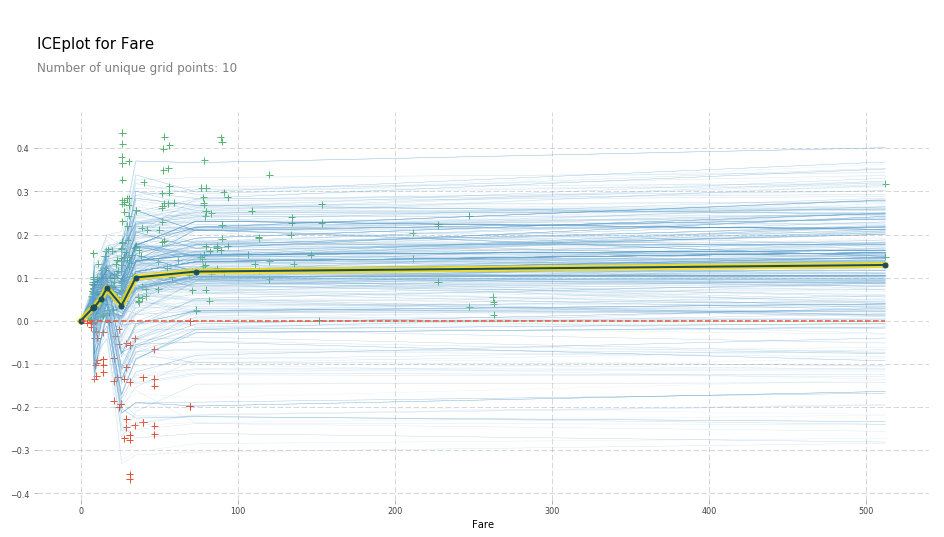

In [24]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=500)

#### for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points

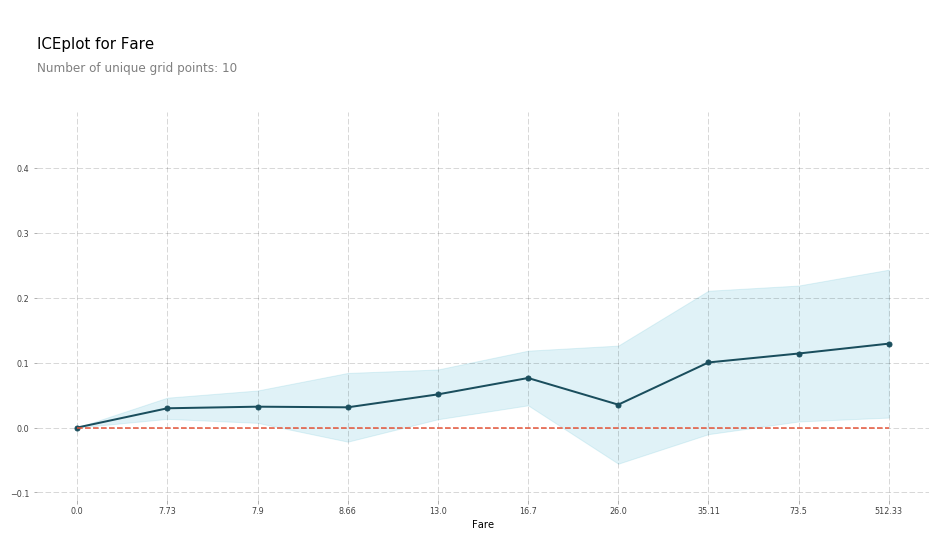

In [20]:
pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True)

#### under x_quantile=True mode, the origin points would be assign to their closest quantile

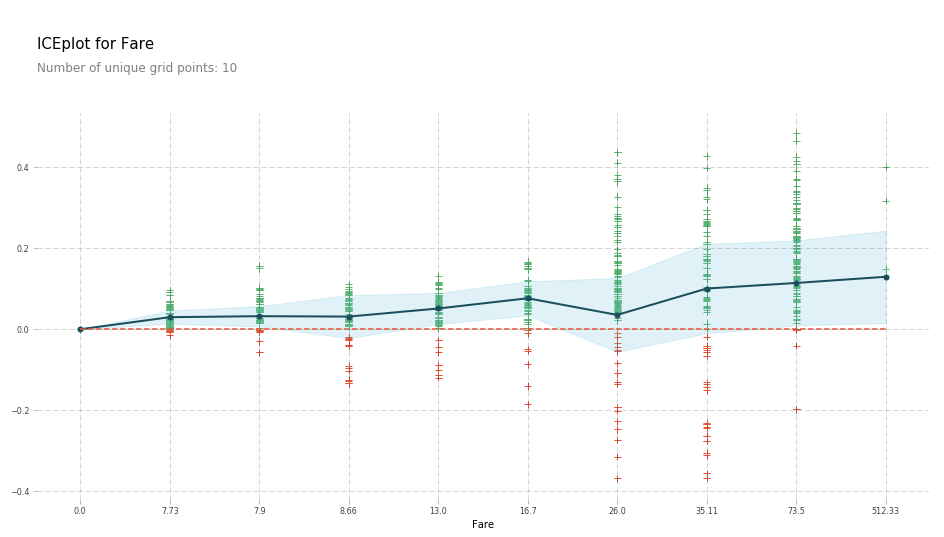

In [22]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, x_quantile=True)

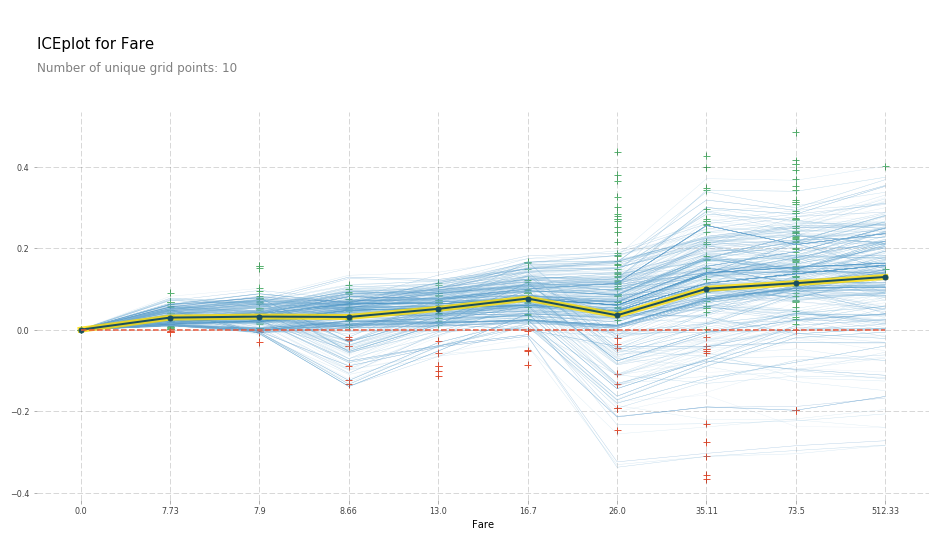

In [25]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also add more number of grid points for the numeric feature

In [23]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20)

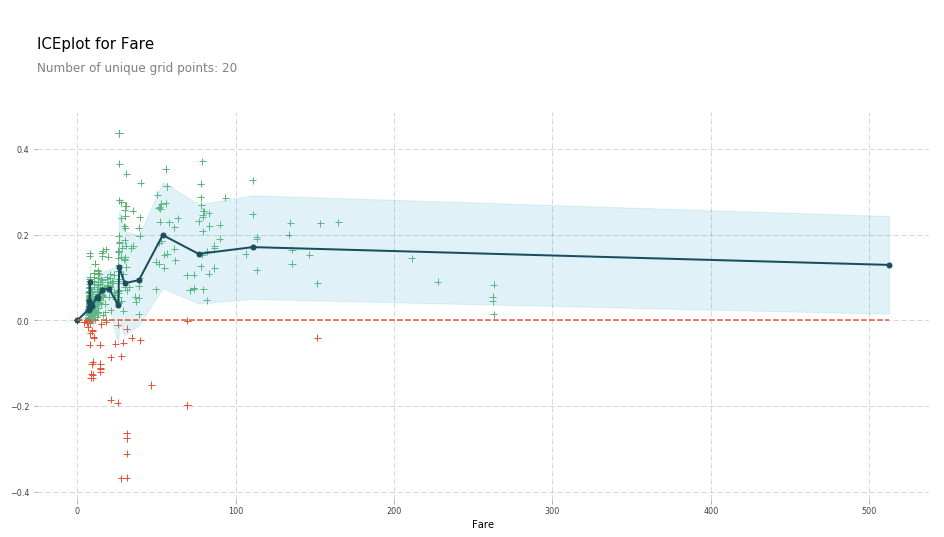

In [24]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5)

#### cluster all individual lines

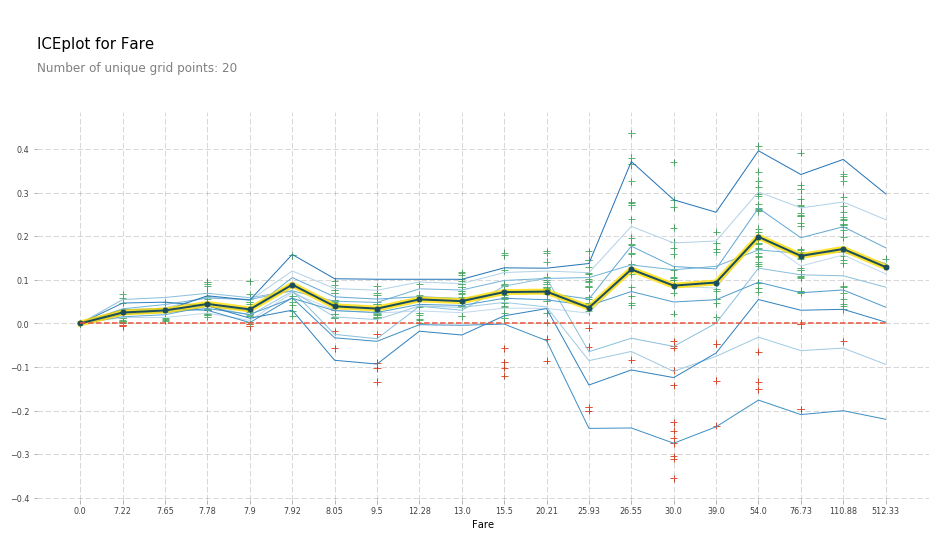

In [26]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True, cluster=True, n_cluster_centers=10)

#### try to choose a reasonable percentile range

In [27]:
pdp_fare = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20, percentile_range=(5, 95))

#### when trying out plot out the original points with customized percentile range
you can find some original points are actually excluded from the customized percentile range

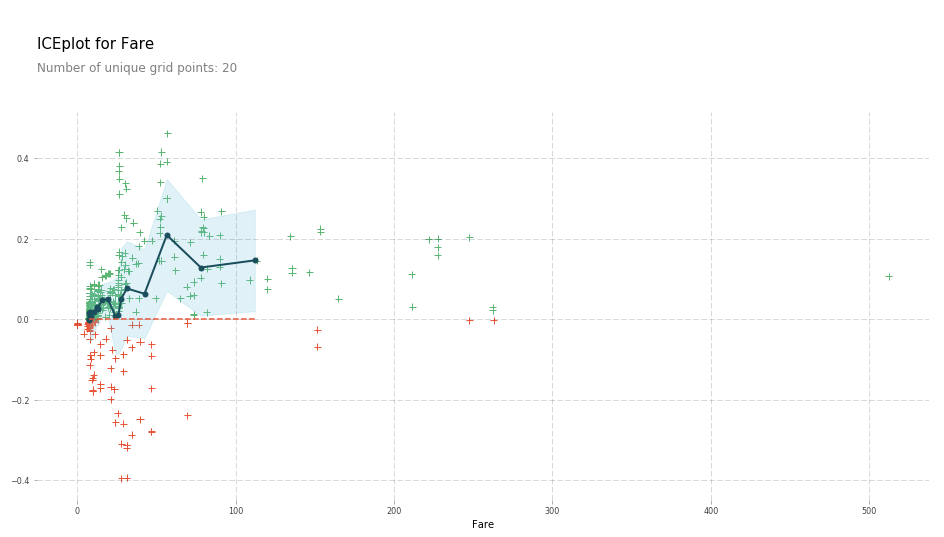

In [28]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5)

#### sure you can set x_quantile=True if you find the plot above uncomfortable

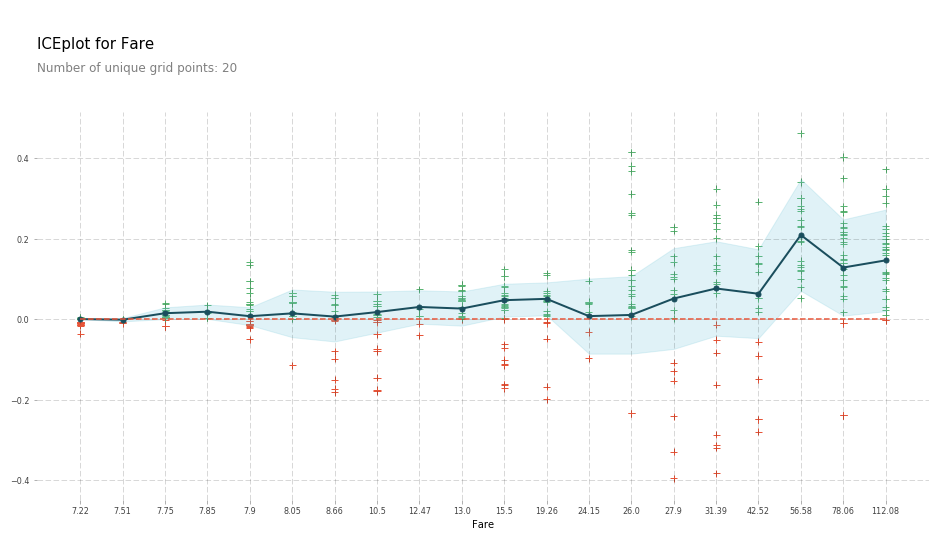

In [29]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_org_pts=True, frac_to_plot=0.5, x_quantile=True)

#### try to set center=False

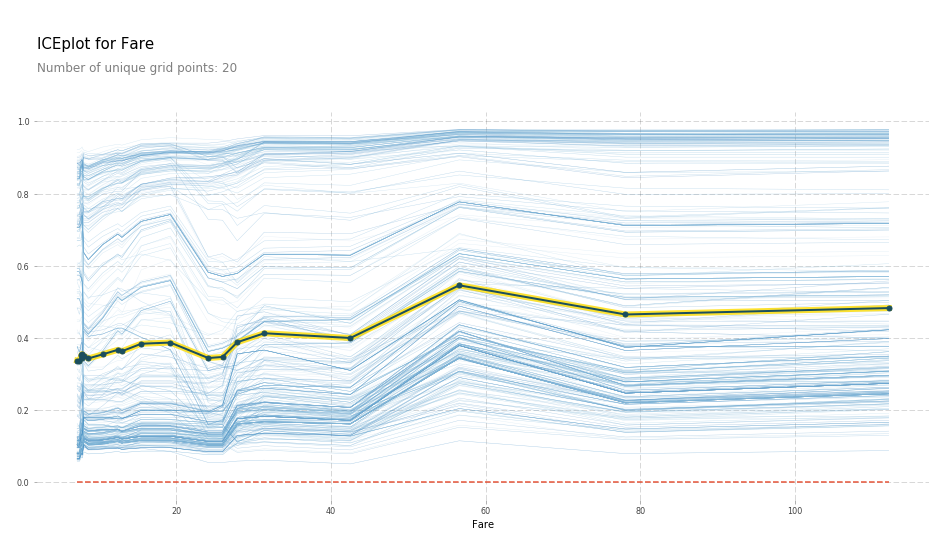

In [30]:
pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, center=False)

## Test interaction between two variables
### interaction between two numeric variables Age and Fare

In [31]:
inter1 = pdp.pdp_interact(clf, titanic[features], ['Age', 'Fare'])

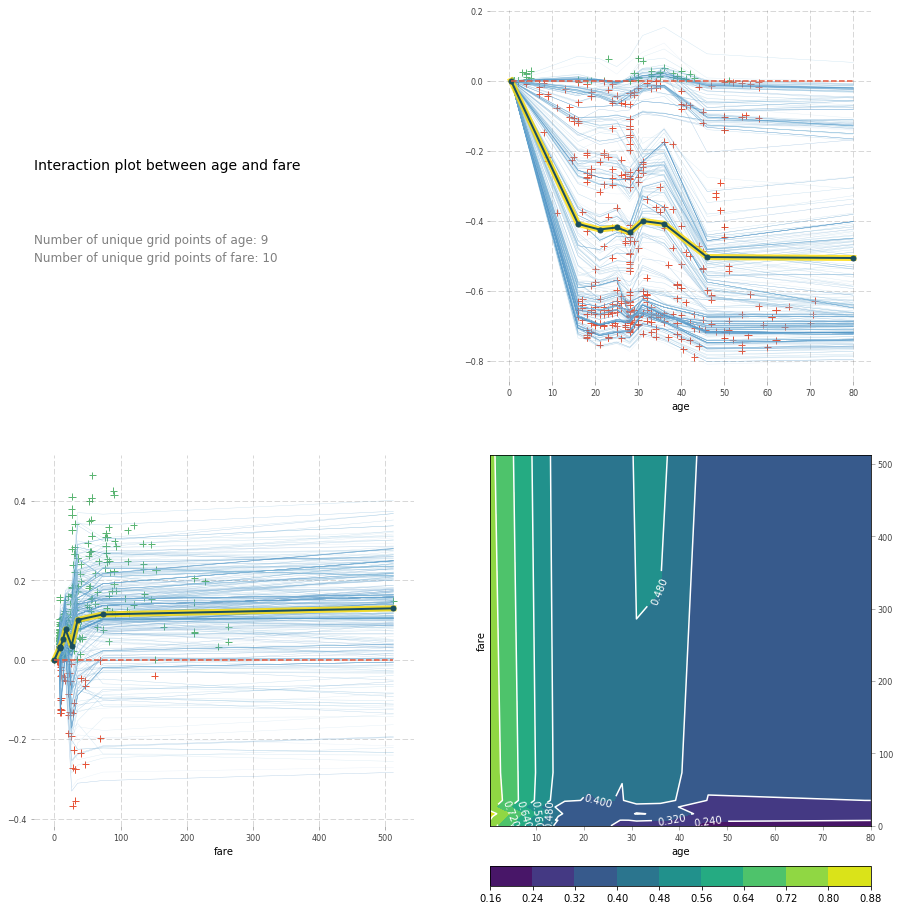

In [33]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#### it is better to set x_quantile=True

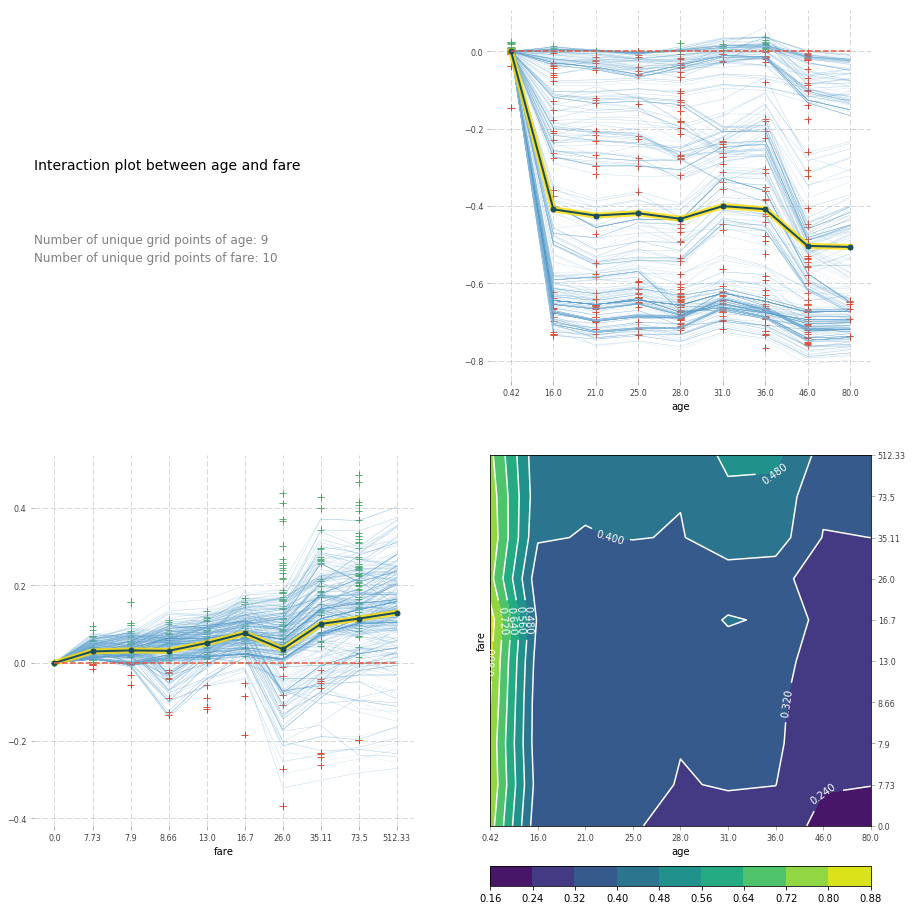

In [34]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also only plot out the contour plot by seting only_inter=True

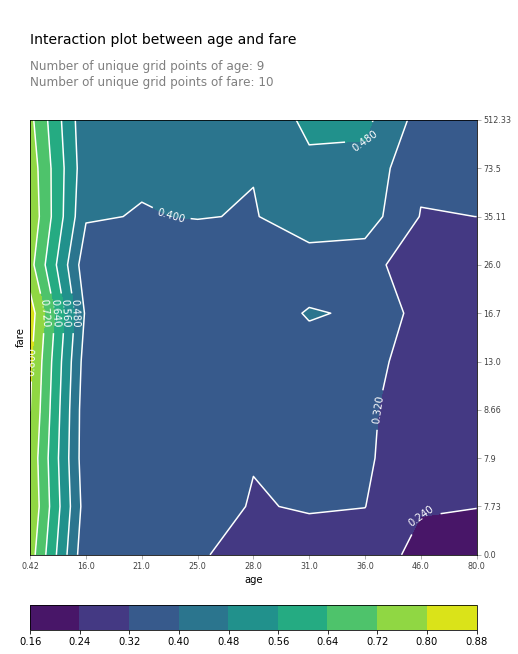

In [35]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], x_quantile=True, only_inter=True)

### interaction between Sex and Age

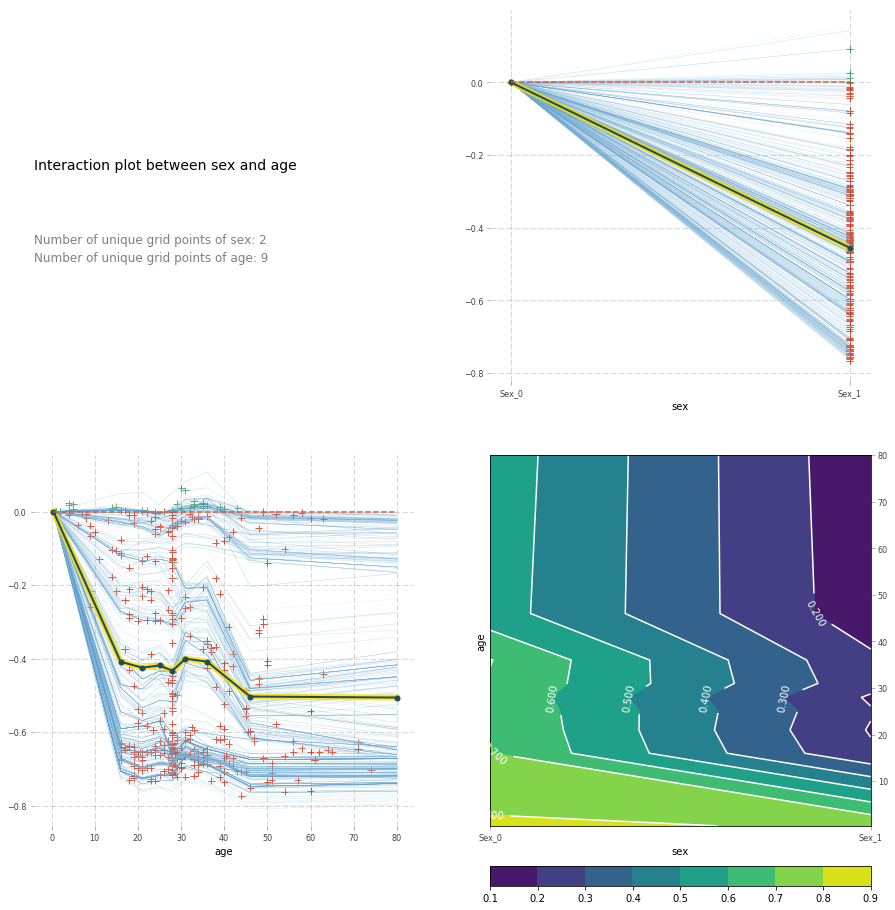

In [54]:
inter_dt3 = pdp.pdp_interact(clf, titanic[features], ['Sex', 'Age'], num_grid_points=[None, 10])
pdp.pdp_interact_plot(inter_dt3, ['sex','age'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

## logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression(C=1.0, random_state=123, n_jobs=4)
%time lr.fit(titanic[features], titanic['Survived'])

CPU times: user 8 ms, sys: 999 µs, total: 9 ms
Wall time: 7.73 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### binary feature: Sex

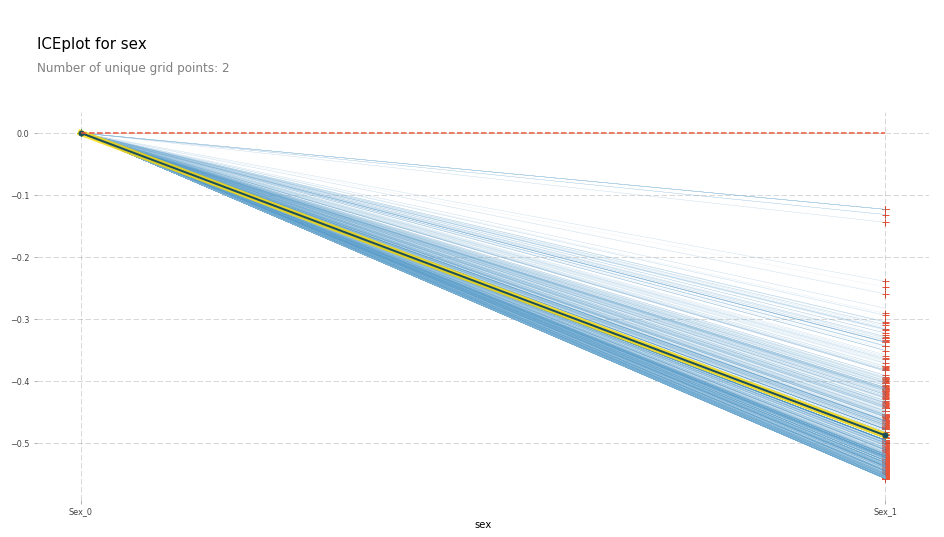

In [38]:
pdp_sex_lr = pdp.pdp_isolate(lr, titanic[features], 'Sex')
pdp.pdp_plot(pdp_sex_lr, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=1)

### numeric feature: Fare

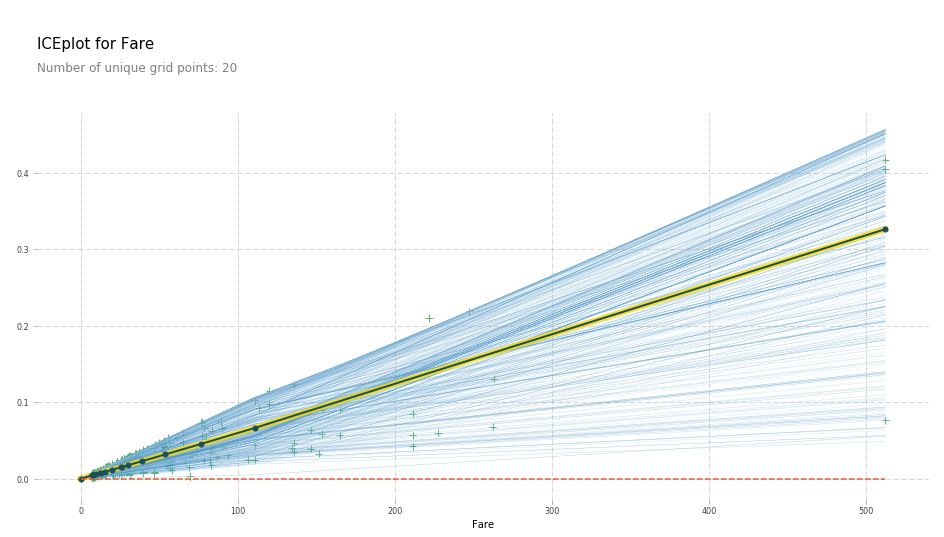

In [40]:
pdp_fare_lr = pdp.pdp_isolate(lr, titanic[features], 'Fare', num_grid_points=20)
pdp.pdp_plot(pdp_fare_lr, 'Fare', plot_org_pts=True, frac_to_plot=0.5, plot_lines=True)

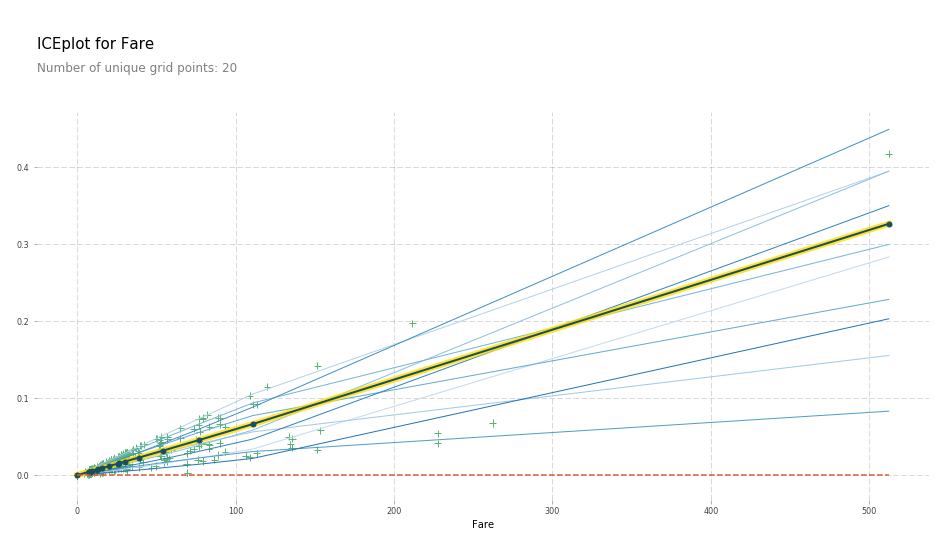

In [41]:
pdp.pdp_plot(pdp_fare_lr, 'Fare', plot_org_pts=True, frac_to_plot=0.5, plot_lines=True, cluster=True, n_cluster_centers=10)

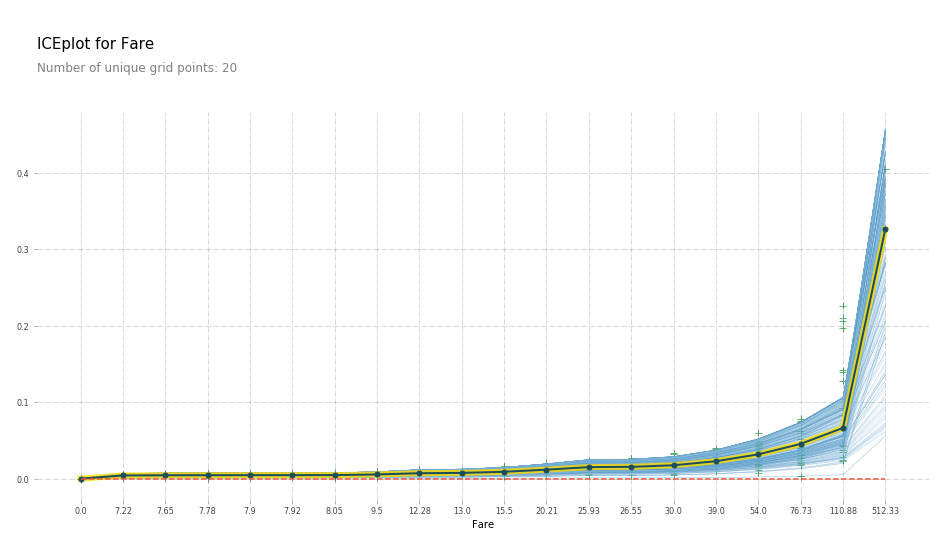

In [42]:
pdp.pdp_plot(pdp_fare_lr, 'Fare', plot_org_pts=True, frac_to_plot=0.5, plot_lines=True, x_quantile=True)

### one-hot encoding feature: Embarked

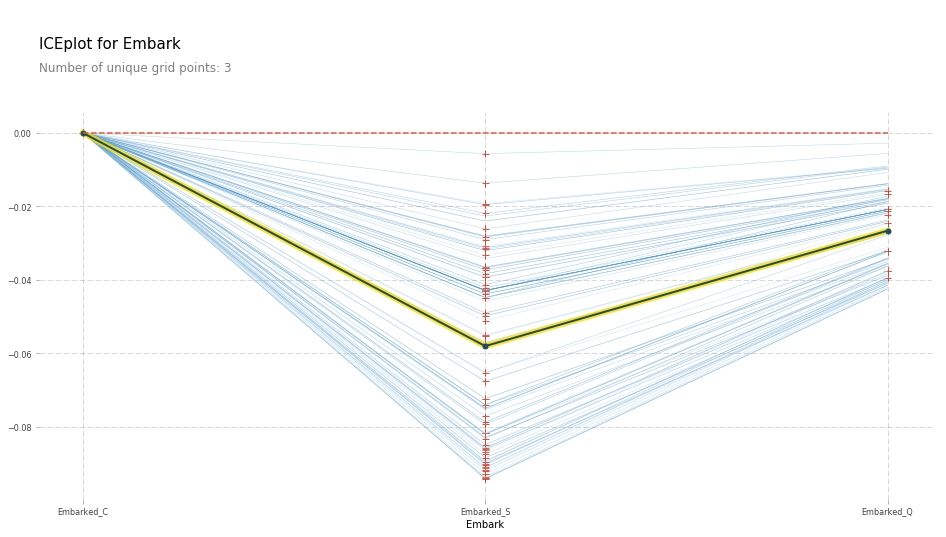

In [43]:
pdp_embark_lr = pdp.pdp_isolate(lr, titanic[features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])
pdp.pdp_plot(pdp_embark_lr, 'Embark', plot_org_pts=True, plot_lines=True, frac_to_plot=100)

### test interaction between age and fare

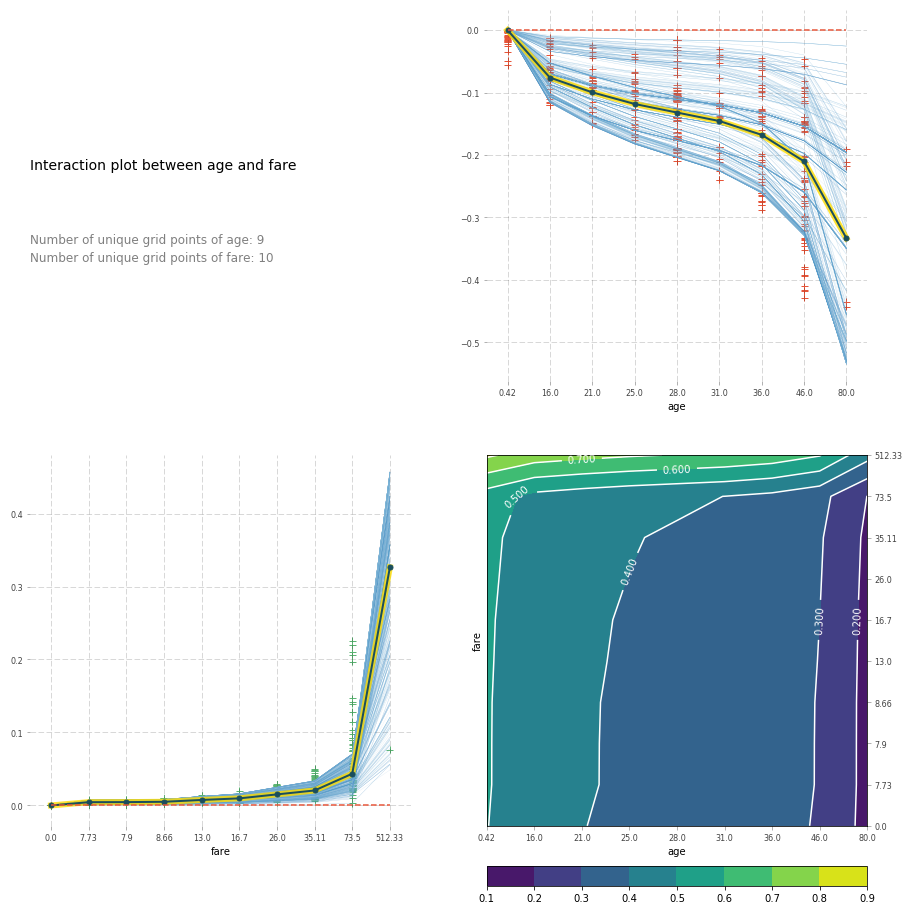

In [44]:
inter_lr = pdp.pdp_interact(lr, titanic[features], ['Age', 'Fare'], num_grid_points=[10, 10], percentile_ranges=[None, None])
pdp.pdp_interact_plot(inter_lr, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

## Decision tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier(random_state=24, max_leaf_nodes=20)
%time dt.fit(titanic[features], titanic['Survived'])

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 3.42 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=24,
            splitter='best')

### numeric feature: Fare

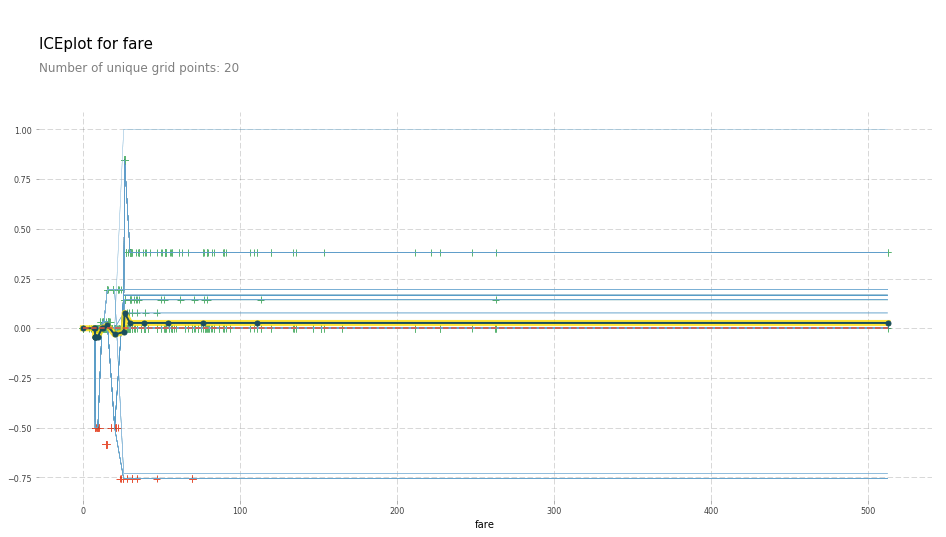

In [47]:
pdp_fare_dt = pdp.pdp_isolate(dt, titanic[features], 'Fare', num_grid_points=20)
pdp.pdp_plot(pdp_fare_dt, 'fare', plot_org_pts=True, plot_lines=True, frac_to_plot=1)

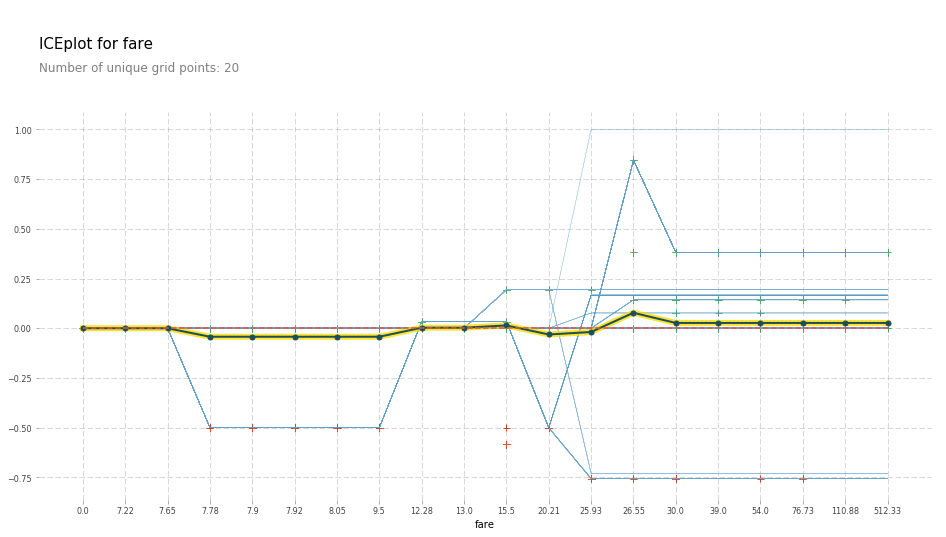

In [48]:
pdp.pdp_plot(pdp_fare_dt, 'fare', plot_org_pts=True, plot_lines=True, frac_to_plot=1, x_quantile=True)

### ont-hot encoding feature: Embarked

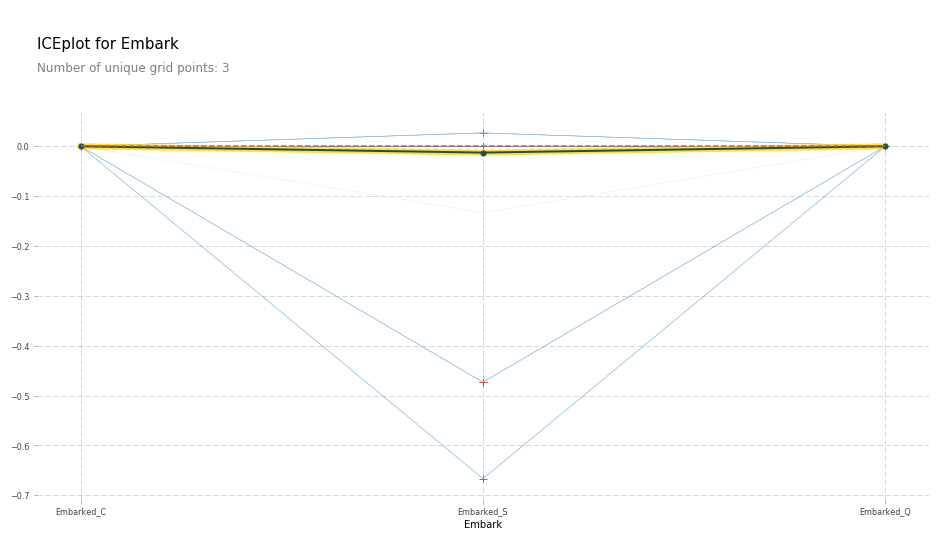

In [49]:
pdp_embark_dt = pdp.pdp_isolate(dt, titanic[features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])
pdp.pdp_plot(pdp_embark_dt, 'Embark', plot_org_pts=True, plot_lines=True, frac_to_plot=100)

### interaction between age and fare

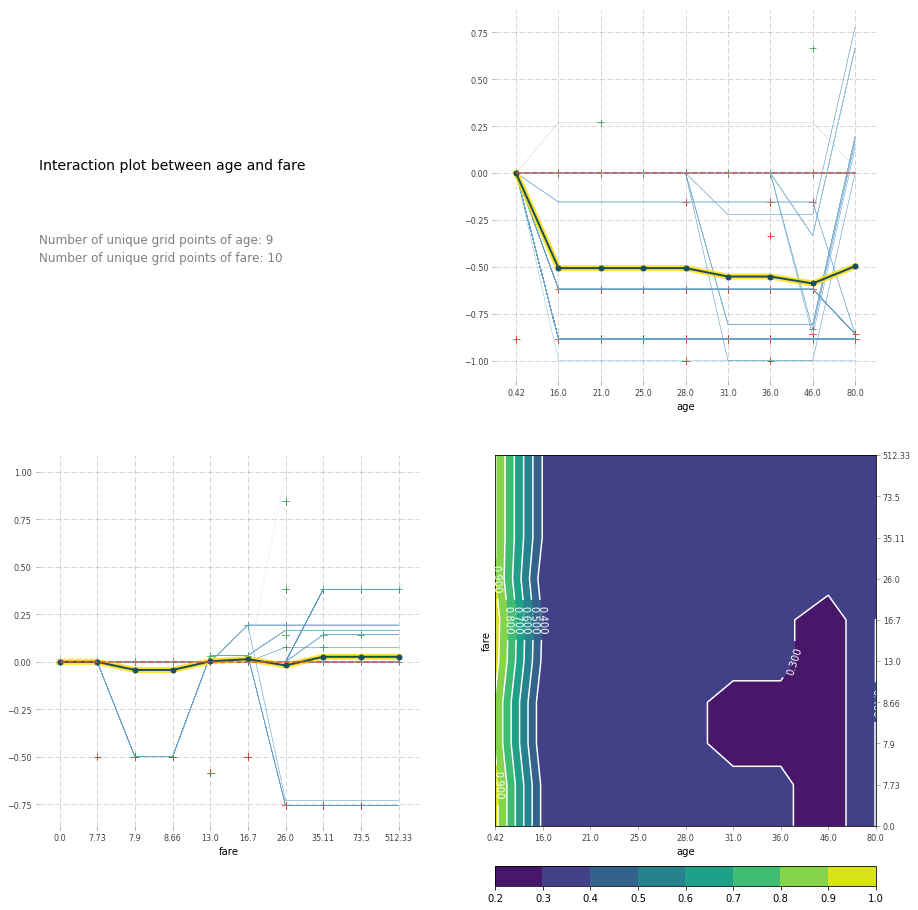

In [50]:
inter_dt = pdp.pdp_interact(dt, titanic[features], ['Age', 'Fare'], num_grid_points=[10, 10])
pdp.pdp_interact_plot(inter_dt, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

### interaction between Embarked and age

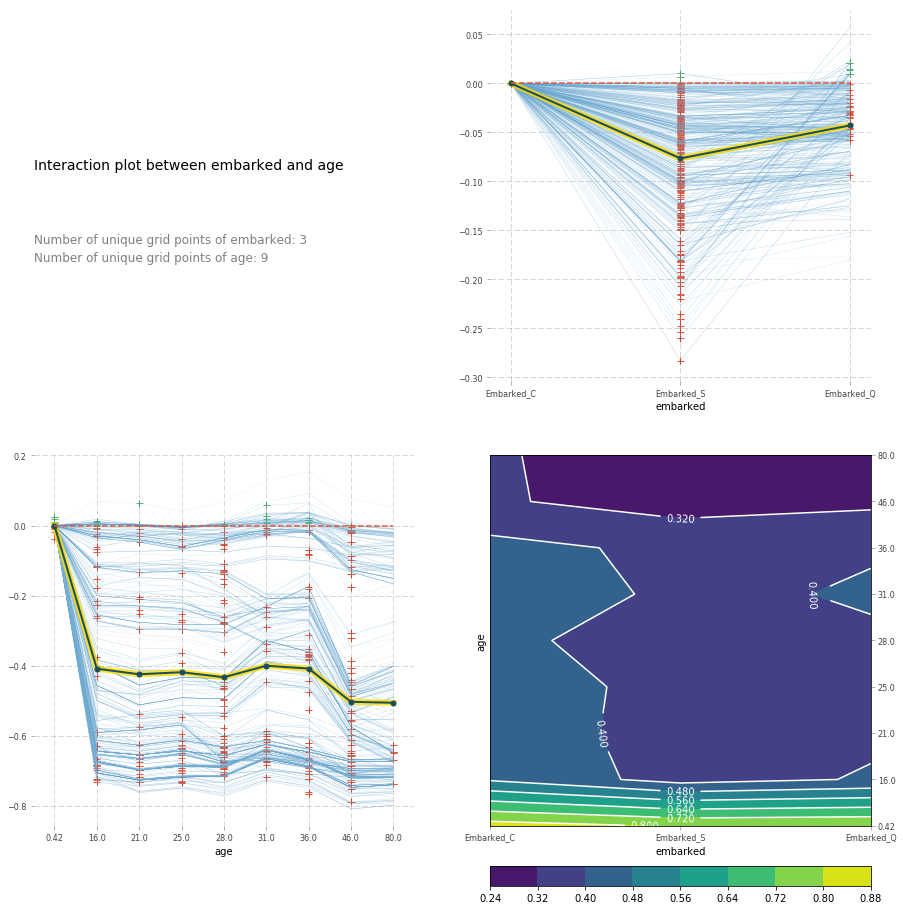

In [52]:
inter_dt2 = pdp.pdp_interact(clf, titanic[features], [['Embarked_C', 'Embarked_S', 'Embarked_Q'], 'Age'], num_grid_points=[None, 10])
pdp.pdp_interact_plot(inter_dt2, ['embarked','age'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

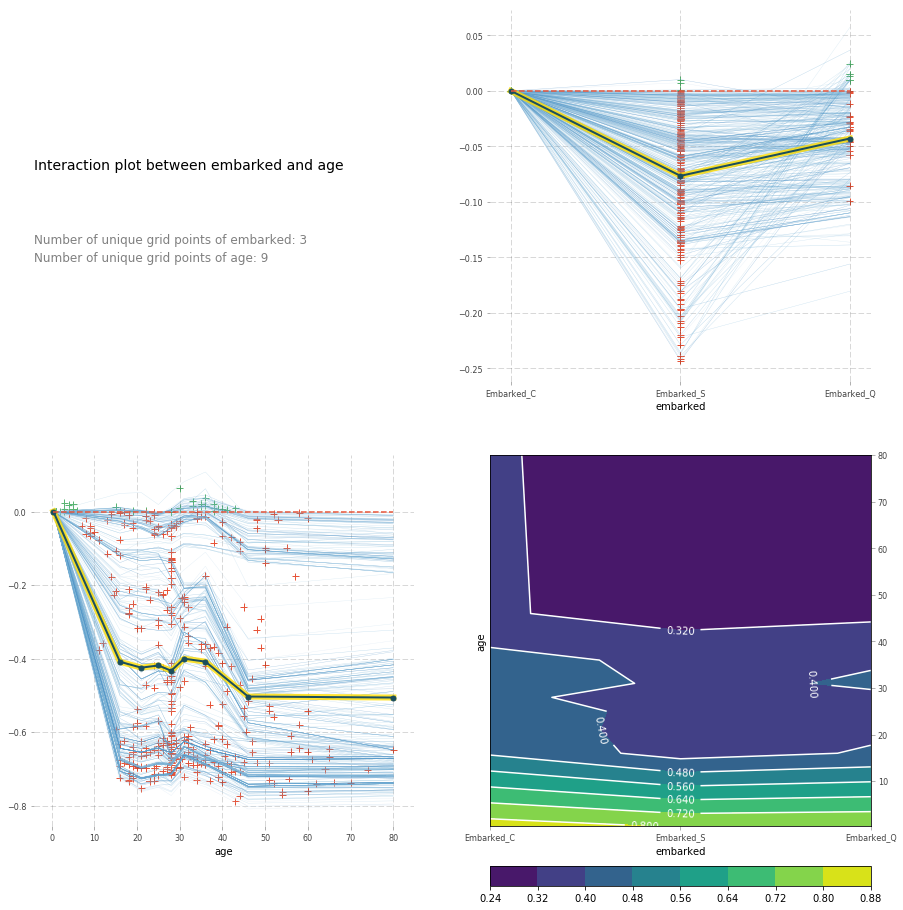

In [53]:
pdp.pdp_interact_plot(inter_dt2, ['embarked','age'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=False)